In [11]:
# Python model for proof of concept
# Author: Owen Deng, Kunpeng Huang

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random

# trying out the algorithm entailed here: http://new.math.uiuc.edu/im2008/dakkak/implementation/implementation.html
class HPP_Simulation:
    def __init__(self, width, height) -> None:
        self.w = width
        self.h = height
        
        # board variables
        self.a = np.zeros((width, height), dtype=np.int8)
        self.b = np.zeros_like(self.a)
        self.c = np.zeros_like(self.a)
        self.d = np.zeros_like(self.a)

        # temp variables
        self.K_a = np.zeros_like(self.a)
        self.K_b = np.zeros_like(self.a)
        self.K_c = np.zeros_like(self.a)
        self.K_d = np.zeros_like(self.a)

    # prob of setting a direction in a cell to 1
    def init_board_urand(self, prob) -> None:
        for x in range(self.w):
            for y in range(self.h):
                self.a[x][y] = random.random() < prob

        for x in range(self.w):
            for y in range(self.h):
                self.b[x][y] = random.random() < prob

        for x in range(self.w):
            for y in range(self.h):
                self.c[x][y] = random.random() < prob

        for x in range(self.w):
            for y in range(self.h):
                self.d[x][y] = random.random() < prob

    def init_board_sq(self) -> None:
        for x in range(int(self.w * 0.25), int(self.w * 0.75)):
            for y in range(int(self.h * 0.25), int(self.h * 0.75)):
                self.a[x][y] = 1
                self.b[x][y] = 1

    def collision_phase(self) -> None:
        for x in range(self.w):
            for y in range(self.h):
                change = (self.a[x][y] & self.c[x][y] & ~(self.b[x][y] | self.d[x][y])) | (self.b[x][y] & self.d[x][y] & ~(self.a[x][y] | self.c[x][y]))

                self.K_a[x][y] = self.a[x][y] ^ change
                self.K_b[x][y] = self.b[x][y] ^ change
                self.K_c[x][y] = self.c[x][y] ^ change
                self.K_d[x][y] = self.d[x][y] ^ change

                obstacle = x == self.w - 1 or x == 0 or y == 0 or y == self.h - 1

                # resolve obstacle
                self.K_a[x][y] = self.K_c[x][y] if (obstacle and self.K_c[x][y]) else self.K_a[x][y]
                self.K_b[x][y] = self.K_d[x][y] if (obstacle and self.K_d[x][y]) else self.K_b[x][y]
                self.K_c[x][y] = self.K_a[x][y] if (obstacle and self.K_a[x][y]) else self.K_c[x][y]
                self.K_d[x][y] = self.K_b[x][y] if (obstacle and self.K_b[x][y]) else self.K_d[x][y]

    def propagation_phase(self) -> None:
        for x in range(self.w):
            for y in range(self.h):
                self.a[x][y] = self.K_a[x-1][y] if (x-1) >= 0 else False
                self.b[x][y] = self.K_b[x][y+1] if (y+1) < self.h else False
                self.c[x][y] = self.K_c[x+1][y] if (x+1) < self.w else False
                self.d[x][y] = self.K_d[x][y-1] if (y-1) >= 0 else False

    def evolve(self) -> None:
        self.collision_phase()
        self.propagation_phase()

    def save_img(self, idx) -> None:
        plt.imsave('temp/' + str(idx) + '.png', self.a + self.b + self.c + self.d, cmap="Greys")

    def generate_gif(self, steps = 400) -> None:
        ims = []
        fig = plt.figure()

        for i in range(steps):
            im = plt.imshow(self.a + self.b + self.c + self.d, cmap="Greys", animated=True)
            ims.append([im])
            self.evolve()

            if (i % int(steps/10) == 0):
                print(f'current progress: {i}/{steps}')
        
        ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=0)

        ani.save('animation.gif')


current progress: 0/400
current progress: 40/400
current progress: 80/400
current progress: 120/400
current progress: 160/400
current progress: 200/400
current progress: 240/400
current progress: 280/400
current progress: 320/400
current progress: 360/400


MovieWriter ffmpeg unavailable; using Pillow instead.


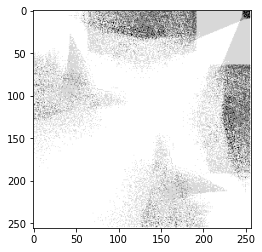

In [12]:
hpp_simulator = HPP_Simulation(256, 256)
hpp_simulator.init_board_sq()

hpp_simulator.generate_gif()